<a href="https://colab.research.google.com/github/AnthonyJia/DS4002_Project3/blob/main/SCRIPTS/download_data_and_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import zipfile
import shutil

# Paths inside your Google Drive
FFHQ_PATH = '/content/drive/MyDrive/ai_classification_dataset/ffhq' # Change this path depending on where the data lives in your drive
STYLEGAN_PATH = '/content/drive/MyDrive/ai_classification_dataset/stylegan' # Change this path depending on where the data lives in your drive

# Output folders
OUTPUT_DIR = '/content/dataset'
REAL_DIR = os.path.join(OUTPUT_DIR, 'real_images')
FAKE_DIR = os.path.join(OUTPUT_DIR, 'fake_images')

os.makedirs(REAL_DIR, exist_ok=True)
os.makedirs(FAKE_DIR, exist_ok=True)

In [ ]:
import glob

for folder in sorted(glob.glob(os.path.join(FFHQ_PATH, '*'))):
    folder_name = os.path.basename(folder)
    """
    This effectively downloads all real face images from the FFHQ dataset from folders 00000 - 09000 (10k images).
    If you want to include more images, you can change the code to stop at a higher number folder
    (e.g., 15000 will include folders 00000 - 15000 (16k images)).
    """
    if int(folder_name) <= 9000:
        dest_folder = os.path.join(REAL_DIR, folder_name)
        shutil.copytree(folder, dest_folder, dirs_exist_ok=True)


In [ ]:
import glob

for zip_path in sorted(glob.glob(os.path.join(STYLEGAN_PATH, '*.zip'))):
    folder_num = int(os.path.basename(zip_path).replace('.zip', ''))
    """
    This effectively downloads all fake face images from the StyleGAN dataset from folders 00000 - 09000 (10k images).
    If you want to include more images, you can change the code to stop at a higher number folder.
    (e.g., 15000 will include folders 00000 - 15000 (16k images)).
    """
    if folder_num > 9000:  # stop after first 10,000 images
        break

    # Create a subfolder with the same name as the zip
    folder_name = os.path.basename(zip_path).replace('.zip', '')
    dest_folder = os.path.join(FAKE_DIR, folder_name)
    os.makedirs(dest_folder, exist_ok=True)

    # Extract zip contents into that subfolder
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(dest_folder)

In [ ]:
from pathlib import Path

real_count = len(list(Path(REAL_DIR).rglob('*.png')))
fake_count = len(list(Path(FAKE_DIR).rglob('*.png')))

print(f"Real images: {real_count}")
print(f"Fake images: {fake_count}")

Real images: 10000
Fake images: 10000


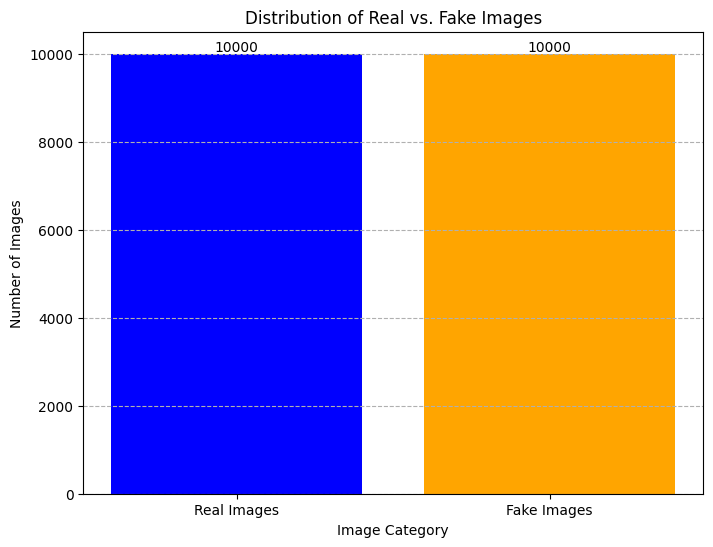

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from previous steps
image_counts = {'Real Images': real_count, 'Fake Images': fake_count}

df_counts = pd.DataFrame(list(image_counts.items()), columns=['Category', 'Count'])

plt.figure(figsize=(8, 6))
plt.bar(df_counts['Category'], df_counts['Count'], color=['blue', 'orange'])
plt.xlabel('Image Category')
plt.ylabel('Number of Images')
plt.title('Distribution of Real vs. Fake Images')
plt.grid(axis='y', linestyle='--')

# Add count labels on top of the bars
for index, row in df_counts.iterrows():
    plt.text(row['Category'], row['Count'] + 50, str(row['Count']), color='black', ha='center')

plt.show()

## Visual check
Sample 5 real and 5 fake images, display them in a grid, and review them for visual characteristics such as centering, cropping, alignment, compression artifacts, texture patterns, lighting, and color tones.

In [ ]:
import random
from pathlib import Path

# Get all real image paths
real_image_paths = list(Path(REAL_DIR).rglob('*.png'))

# Randomly select 5 real image paths
sampled_real_images = random.sample(real_image_paths, 5)

# Get all fake image paths
fake_image_paths = list(Path(FAKE_DIR).rglob('*.png'))

# Randomly select 5 fake image paths
sampled_fake_images = random.sample(fake_image_paths, 5)

print("\n--- Sampled Real Image Paths ---")
for img_path in sampled_real_images:
    print(img_path)

print("\n--- Sampled Fake Image Paths ---")
for img_path in sampled_fake_images:
    print(img_path)


--- Sampled Real Image Paths ---
/content/dataset/real_images/06000/06338.png
/content/dataset/real_images/02000/02002.png
/content/dataset/real_images/02000/02154.png
/content/dataset/real_images/00000/00727.png
/content/dataset/real_images/01000/01626.png

--- Sampled Fake Image Paths ---
/content/dataset/fake_images/009000/009811.png
/content/dataset/fake_images/009000/009987.png
/content/dataset/fake_images/001000/001252.png
/content/dataset/fake_images/007000/007643.png
/content/dataset/fake_images/003000/003045.png


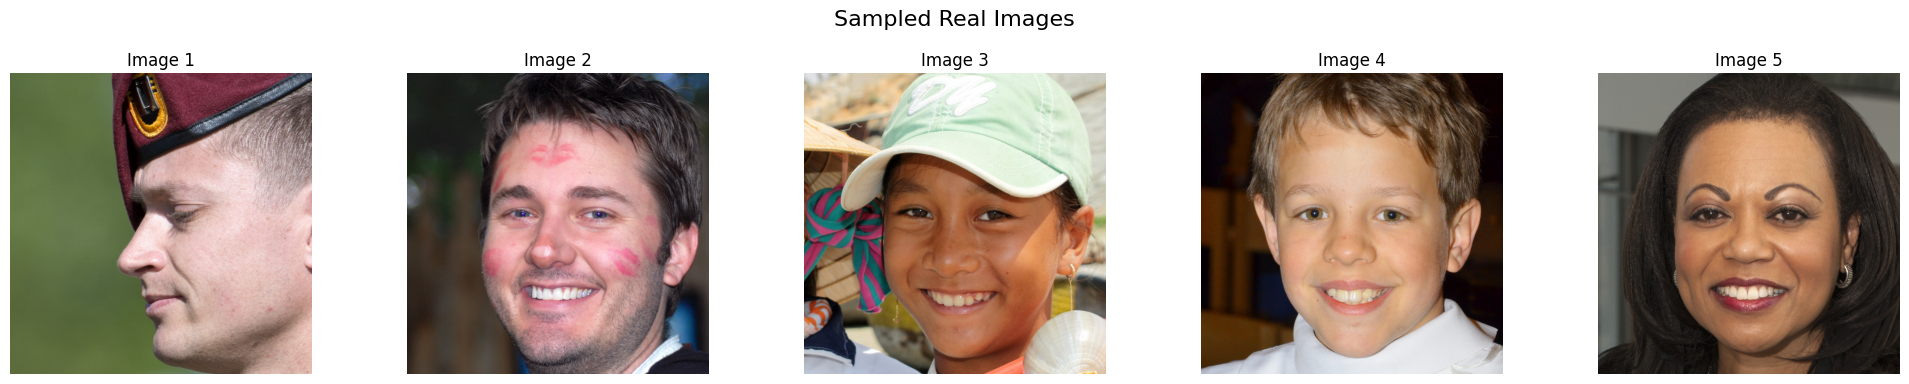

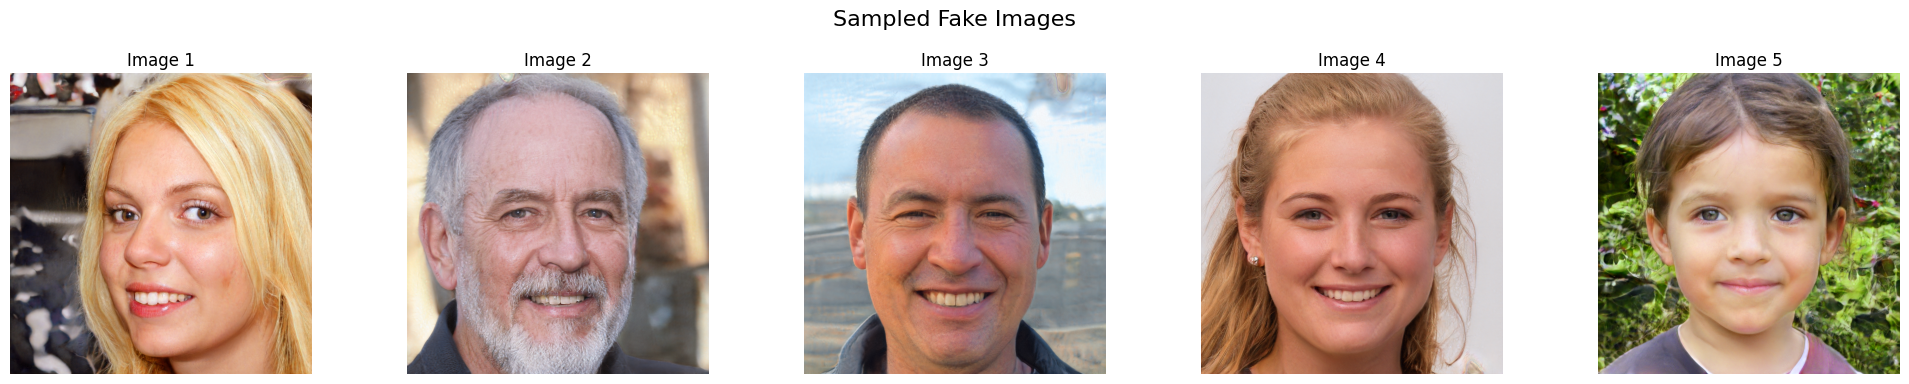

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def display_images_in_grid(image_paths, title, num_rows, num_cols):
    plt.figure(figsize=(num_cols * 4, num_rows * 4))
    plt.suptitle(title, fontsize=16)
    for i, img_path in enumerate(image_paths):
        plt.subplot(num_rows, num_cols, i + 1)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(f'Image {i+1}')
        plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

# Display sampled real images
display_images_in_grid(sampled_real_images, 'Sampled Real Images', 1, 5)

# Display sampled fake images
display_images_in_grid(sampled_fake_images, 'Sampled Fake Images', 1, 5)

## Randomly sample 500 images from each dataset to perform EDA
Randomly select 500 image paths from `REAL_DIR` and 500 image paths from `FAKE_DIR` to create a manageable subset for analysis.

In [ ]:
import random
from pathlib import Path

# Get all real image paths
all_real_image_paths = list(Path(REAL_DIR).rglob('*.png'))

# Randomly select 500 real image paths
sampled_real_images_subset = random.sample(all_real_image_paths, 500)

# Get all fake image paths
all_fake_image_paths = list(Path(FAKE_DIR).rglob('*.png'))

# Randomly select 500 fake image paths
sampled_fake_images_subset = random.sample(all_fake_image_paths, 500)

print(f"Number of sampled real images: {len(sampled_real_images_subset)}")
print(f"Number of sampled fake images: {len(sampled_fake_images_subset)}")

print("\nFirst 5 sampled real image paths:")
for i, path in enumerate(sampled_real_images_subset[:5]):
    print(f"  {i+1}. {path}")

print("\nFirst 5 sampled fake image paths:")
for i, path in enumerate(sampled_fake_images_subset[:5]):
    print(f"  {i+1}. {path}")

Number of sampled real images: 500
Number of sampled fake images: 500

First 5 sampled real image paths:
  1. /content/dataset/real_images/09000/09442.png
  2. /content/dataset/real_images/03000/03342.png
  3. /content/dataset/real_images/06000/06209.png
  4. /content/dataset/real_images/05000/05236.png
  5. /content/dataset/real_images/06000/06188.png

First 5 sampled fake image paths:
  1. /content/dataset/fake_images/009000/009115.png
  2. /content/dataset/fake_images/003000/003856.png
  3. /content/dataset/fake_images/001000/001484.png
  4. /content/dataset/fake_images/007000/007227.png
  5. /content/dataset/fake_images/000000/000317.png


## Extract Image Properties

For each image in the sampled subset, extract its dimensions (width and height), calculate its aspect ratio, and compute its average RGB color values. Store these properties in a structured format, like a Pandas DataFrame.


In [ ]:
import pandas as pd
from PIL import Image

image_data = []

def get_avg_rgb(image):
    # Ensure image is in RGB format
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # Get image data as a list of pixel values
    pixels = list(image.getdata())

    # Calculate sum of R, G, B channels
    r_sum = sum(p[0] for p in pixels)
    g_sum = sum(p[1] for p in pixels)
    b_sum = sum(p[2] for p in pixels)

    # Calculate average R, G, B
    num_pixels = len(pixels)
    avg_r = r_sum / num_pixels
    avg_g = g_sum / num_pixels
    avg_b = b_sum / num_pixels

    return avg_r, avg_g, avg_b

# Process real images
for img_path in sampled_real_images_subset:
    try:
        with Image.open(img_path) as img:
            width, height = img.size
            aspect_ratio = width / height
            avg_r, avg_g, avg_b = get_avg_rgb(img)
            image_data.append({
                'path': str(img_path),
                'category': 'real',
                'width': width,
                'height': height,
                'aspect_ratio': aspect_ratio,
                'avg_r': avg_r,
                'avg_g': avg_g,
                'avg_b': avg_b
            })
    except Exception as e:
        print(f"Error processing real image {img_path}: {e}")

# Process fake images
for img_path in sampled_fake_images_subset:
    try:
        with Image.open(img_path) as img:
            width, height = img.size
            aspect_ratio = width / height
            avg_r, avg_g, avg_b = get_avg_rgb(img)
            image_data.append({
                'path': str(img_path),
                'category': 'fake',
                'width': width,
                'height': height,
                'aspect_ratio': aspect_ratio,
                'avg_r': avg_r,
                'avg_g': avg_g,
                'avg_b': avg_b
            })
    except Exception as e:
        print(f"Error processing fake image {img_path}: {e}")

# Convert to DataFrame
df_image_properties = pd.DataFrame(image_data)

print(f"DataFrame created with {len(df_image_properties)} entries.")
print(df_image_properties.head())

DataFrame created with 1000 entries.
                                           path category  width  height  \
0  /content/dataset/real_images/09000/09442.png     real   1024    1024   
1  /content/dataset/real_images/03000/03342.png     real   1024    1024   
2  /content/dataset/real_images/06000/06209.png     real   1024    1024   
3  /content/dataset/real_images/05000/05236.png     real   1024    1024   
4  /content/dataset/real_images/06000/06188.png     real   1024    1024   

   aspect_ratio       avg_r       avg_g       avg_b  
0           1.0   84.338155   64.289859   54.448208  
1           1.0  136.807047  113.772976  110.632255  
2           1.0  115.098693  106.267040   96.332499  
3           1.0   71.612320   49.094146   43.513090  
4           1.0  168.886986  150.811481  134.468756  


In [ ]:
import pandas as pd

# Group by category and calculate descriptive statistics for specified columns
properties_to_analyze = ['width', 'height', 'aspect_ratio', 'avg_r', 'avg_g', 'avg_b']
descriptive_stats = df_image_properties.groupby('category')[properties_to_analyze].describe()

print("\n--- Descriptive Statistics for Image Properties (Real vs. Fake) ---")
print(descriptive_stats)


--- Descriptive Statistics for Image Properties (Real vs. Fake) ---
          width                                                      height  \
          count    mean  std     min     25%     50%     75%     max  count   
category                                                                      
fake      500.0  1024.0  0.0  1024.0  1024.0  1024.0  1024.0  1024.0  500.0   
real      500.0  1024.0  0.0  1024.0  1024.0  1024.0  1024.0  1024.0  500.0   

                  ...       avg_g              avg_b                        \
            mean  ...         75%         max  count       mean        std   
category          ...                                                        
fake      1024.0  ...  129.435282  207.616616  500.0  97.223279  31.142652   
real      1024.0  ...  128.533756  184.729634  500.0  96.578835  29.960669   

                                                                   
                min        25%        50%         75%         max  
category

### Observations from Descriptive Statistics (Real vs. Fake Images)

Based on the descriptive statistics for the sampled images:

*   **Dimensions (Width and Height)**:
    *   Both real and fake images consistently have a width and height of 1024 pixels, with a standard deviation of 0. This indicates that all images in the sampled subset are of the same square resolution (1024x1024), which is typical for datasets like FFHQ and StyleGAN.

*   **Aspect Ratio**:
    *   The aspect ratio for both real and fake images is uniformly 1.0, with a standard deviation of 0. This reinforces the observation that all images are square.

*   **Average RGB Color Values (`avg_r`, `avg_g`, `avg_b`)**:
    *   **Mean Values**: The mean values for `avg_r`, `avg_g`, and `avg_b` are very similar between real and fake images. For example, the mean `avg_r` for fake images is approximately 114.77, while for real images it's about 114.39. Similar close values are observed for `avg_g` and `avg_b`. This suggests that on average, the overall color composition is quite similar between the two categories, without a strong bias towards one color in either set.
    *   **Standard Deviation**: The standard deviations for `avg_r`, `avg_g`, and `avg_b` are also very close between real and fake images (e.g., `avg_r` std: ~32.4 for fake vs. ~31.2 for real). This implies that the spread or variability in color tones across the images is comparable for both real and fake sets.
    *   **Min/Max and Quartiles**: The minimum, maximum, and quartile values for the average RGB channels are also quite similar, indicating similar ranges and distributions of overall image brightness and color saturation between the real and fake categories.

### Conclusion from Statistical Analysis

At a high level, this statistical analysis of basic image properties (dimensions, aspect ratio, and average color) does not reveal any significant systematic differences between the real and fake image subsets. Both sets appear to be composed of 1024x1024 square images with very similar overall color distributions. This suggests that more nuanced features or visual patterns, rather than these basic properties, will likely be necessary to differentiate between real and fake images.

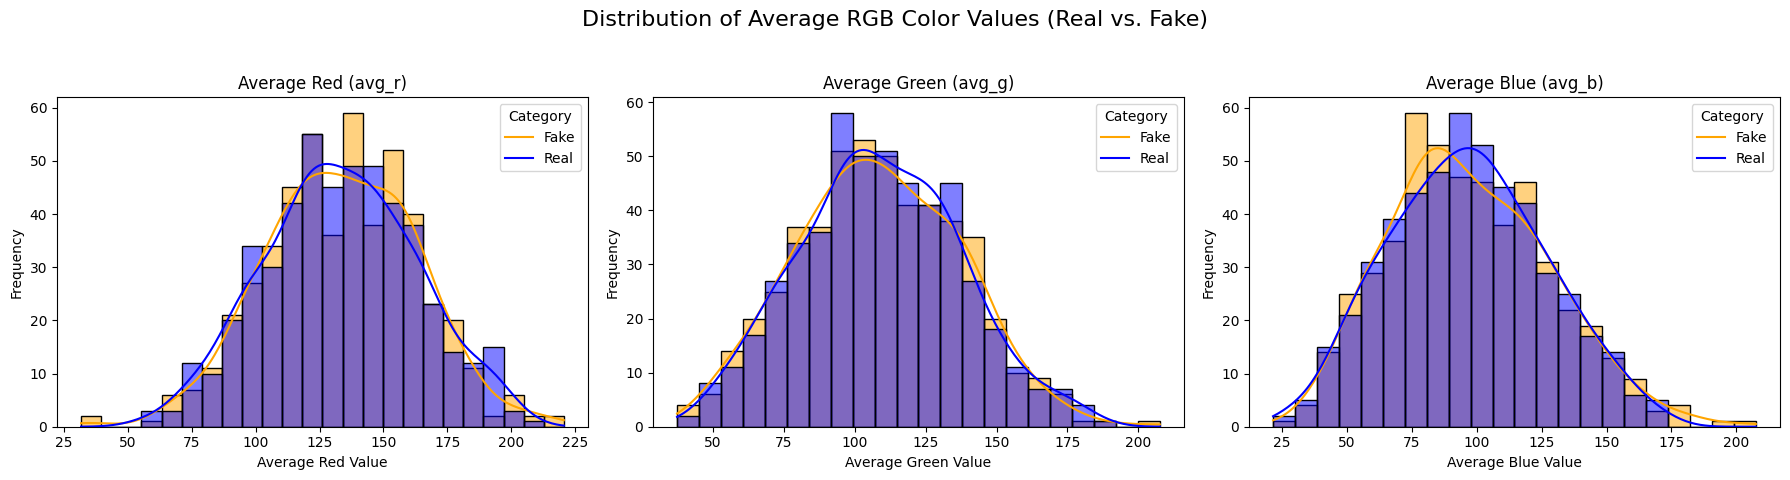

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots for color distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution of Average RGB Color Values (Real vs. Fake)', fontsize=16)

# Plot for Red channel
sns.histplot(data=df_image_properties, x='avg_r', hue='category', kde=True, ax=axes[0], palette={'real': 'blue', 'fake': 'orange'})
axes[0].set_title('Average Red (avg_r)')
axes[0].set_xlabel('Average Red Value')
axes[0].set_ylabel('Frequency')
axes[0].legend(title='Category', labels=['Fake', 'Real'])

# Plot for Green channel
sns.histplot(data=df_image_properties, x='avg_g', hue='category', kde=True, ax=axes[1], palette={'real': 'blue', 'fake': 'orange'})
axes[1].set_title('Average Green (avg_g)')
axes[1].set_xlabel('Average Green Value')
axes[1].set_ylabel('Frequency')
axes[1].legend(title='Category', labels=['Fake', 'Real'])

# Plot for Blue channel
sns.histplot(data=df_image_properties, x='avg_b', hue='category', kde=True, ax=axes[2], palette={'real': 'blue', 'fake': 'orange'})
axes[2].set_title('Average Blue (avg_b)')
axes[2].set_xlabel('Average Blue Value')
axes[2].set_ylabel('Frequency')
axes[2].legend(title='Category', labels=['Fake', 'Real'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Observations from Visualizations:

*   **Average RGB Color Distributions**: The histograms for average Red, Green, and Blue color values show very similar distributions between real and fake images. Both categories exhibit a broad range of color intensities, with their peaks and spreads largely overlapping. This visually confirms the statistical observation that there are no significant differences in the average color composition at this high level.

*   **Dimensions and Aspect Ratio**: As previously observed in the descriptive statistics, all sampled images (both real and fake) have a consistent resolution of 1024x1024 pixels, resulting in a uniform aspect ratio of 1.0. Therefore, creating separate histograms for these properties would result in a single bar at 1024 for width and height, and a single bar at 1.0 for aspect ratio, which would not add further analytical value. The consistency in these properties across both categories implies that these features are not distinguishing factors for real vs. fake images in this dataset.

## Calculate Brightness

### Subtask:
Calculate a brightness metric (e.g., luminance) for each image in the `df_image_properties` DataFrame, using the previously extracted `avg_r`, `avg_g`, and `avg_b` values. A common formula for luminance is `0.299*R + 0.587*G + 0.114*B`.


In [ ]:
df_image_properties['brightness'] = 0.299 * df_image_properties['avg_r'] + 0.587 * df_image_properties['avg_g'] + 0.114 * df_image_properties['avg_b']

print("DataFrame with new 'brightness' column:")
print(df_image_properties.head())

DataFrame with new 'brightness' column:
                                           path category  width  height  \
0  /content/dataset/real_images/09000/09442.png     real   1024    1024   
1  /content/dataset/real_images/03000/03342.png     real   1024    1024   
2  /content/dataset/real_images/06000/06209.png     real   1024    1024   
3  /content/dataset/real_images/05000/05236.png     real   1024    1024   
4  /content/dataset/real_images/06000/06188.png     real   1024    1024   

   aspect_ratio       avg_r       avg_g       avg_b  brightness  
0           1.0   84.338155   64.289859   54.448208   69.162351  
1           1.0  136.807047  113.772976  110.632255  120.302121  
2           1.0  115.098693  106.267040   96.332499  107.775167  
3           1.0   71.612320   49.094146   43.513090   55.190840  
4           1.0  168.886986  150.811481  134.468756  154.352987  


In [ ]:
brightness_stats = df_image_properties.groupby('category')['brightness'].describe()

print("\n--- Descriptive Statistics for Brightness (Real vs. Fake) ---")
print(brightness_stats)


--- Descriptive Statistics for Brightness (Real vs. Fake) ---
          count        mean        std        min        25%         50%  \
category                                                                   
fake      500.0  114.526838  28.170314  37.943424  93.726418  114.045604   
real      500.0  114.744344  27.706838  47.204588  96.163793  113.781290   

                 75%         max  
category                          
fake      135.211537  209.126912  
real      135.351364  184.724717  


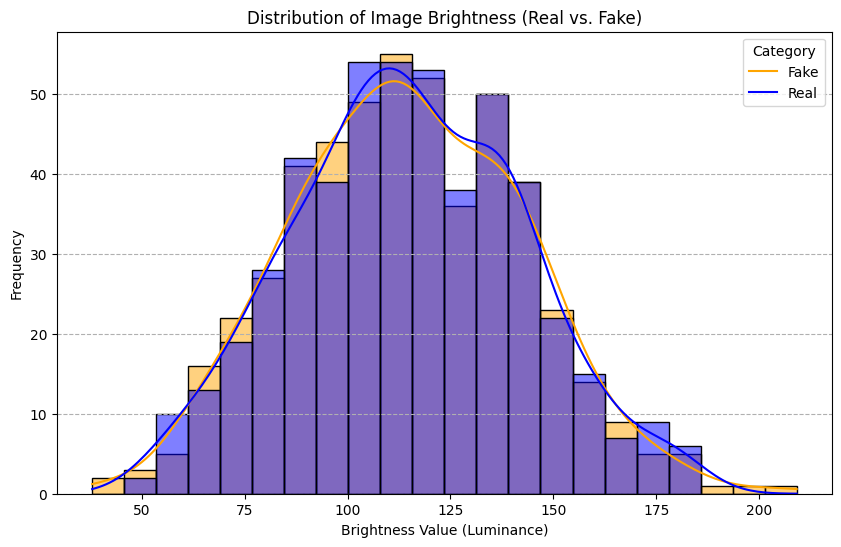

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df_image_properties, x='brightness', hue='category', kde=True, palette={'real': 'blue', 'fake': 'orange'})
plt.title('Distribution of Image Brightness (Real vs. Fake)')
plt.xlabel('Brightness Value (Luminance)')
plt.ylabel('Frequency')
plt.legend(title='Category', labels=['Fake', 'Real'])
plt.grid(axis='y', linestyle='--')
plt.show()

### Data Analysis Key Findings
*   **Brightness (Luminance) Distribution**: After calculating the brightness using the luminance formula, descriptive statistics revealed that the mean brightness for real images (~114.74) and fake images (~114.53) are almost identical. The standard deviations (~27.71 for real, ~28.17 for fake) are also very close, indicating similar variability in brightness. The histogram visualizing brightness further reinforced this, showing highly overlapping distributions for both categories. This suggests that neither real nor fake images are systematically brighter or darker than the other.

### Insights or Next Steps
*   The analysis of basic image properties (dimensions, aspect ratio, average RGB values, and brightness) does not provide strong distinguishing features between real and fake images in this dataset. This implies that the generative model (StyleGAN) is highly effective at replicating these fundamental image characteristics.
*   Future analytical efforts should pivot towards more complex and subtle features. This could involve:
    *   **Texture Analysis**: Examining pixel-level patterns, frequency domain characteristics, or statistical properties of image textures.
    *   **Edge Detection and Gradients**: Differences in sharpness, smoothness, or consistency of edges.
    *   **Higher-Order Statistics**: Looking beyond mean and standard deviation to skewness, kurtosis, or other moments of pixel distributions.
    *   **Feature Extraction using Deep Learning**: Employing pre-trained convolutional neural networks (CNNs) to extract features that might capture more abstract differences between real and fake images.

# Analyze texture/level of detail
Calculate a 2D Fast Fourier Transform (FFT) for each image in the `df_image_properties` DataFrame after converting it to grayscale, then compute the magnitude spectrum, and extract the average magnitude as a new feature, storing it back into `df_image_properties`.

In [ ]:
import numpy as np
from PIL import Image

def calculate_avg_magnitude_spectrum(image_path):
    try:
        # a. Load the image
        with Image.open(image_path) as img:
            # b. Convert the image to grayscale
            gray_img = img.convert('L')

            # c. Convert the grayscale image to a NumPy array
            img_array = np.array(gray_img)

            # d. Perform a 2D Fast Fourier Transform (FFT)
            fft_transform = np.fft.fft2(img_array)

            # e. Shift the zero-frequency component to the center of the spectrum
            fft_shifted = np.fft.fftshift(fft_transform)

            # f. Compute the magnitude spectrum
            magnitude_spectrum = np.abs(fft_shifted)

            # g. Calculate the average of this magnitude spectrum
            average_magnitude = np.mean(magnitude_spectrum)

            # h. Return the average magnitude
            return average_magnitude
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return np.nan # Return NaN for images that could not be processed

print("Libraries imported and 'calculate_avg_magnitude_spectrum' function defined.")

Libraries imported and 'calculate_avg_magnitude_spectrum' function defined.


In [ ]:
df_image_properties['avg_magnitude'] = df_image_properties['path'].apply(calculate_avg_magnitude_spectrum)

print("DataFrame with new 'avg_magnitude' column:")
print(df_image_properties.head())

DataFrame with new 'avg_magnitude' column:
                                           path category  width  height  \
0  /content/dataset/real_images/09000/09442.png     real   1024    1024   
1  /content/dataset/real_images/03000/03342.png     real   1024    1024   
2  /content/dataset/real_images/06000/06209.png     real   1024    1024   
3  /content/dataset/real_images/05000/05236.png     real   1024    1024   
4  /content/dataset/real_images/06000/06188.png     real   1024    1024   

   aspect_ratio       avg_r       avg_g       avg_b  brightness  avg_magnitude  
0           1.0   84.338155   64.289859   54.448208   69.162351    8931.613157  
1           1.0  136.807047  113.772976  110.632255  120.302121    6962.424795  
2           1.0  115.098693  106.267040   96.332499  107.775167    7691.423345  
3           1.0   71.612320   49.094146   43.513090   55.190840    6007.393698  
4           1.0  168.886986  150.811481  134.468756  154.352987    9243.448177  


In [ ]:
avg_magnitude_stats = df_image_properties.groupby('category')['avg_magnitude'].describe()

print("\n--- Descriptive Statistics for Average Magnitude Spectrum (Real vs. Fake) ---")
print(avg_magnitude_stats)


--- Descriptive Statistics for Average Magnitude Spectrum (Real vs. Fake) ---
          count         mean          std          min          25%  \
category                                                              
fake      500.0  6760.563093  1723.950870  3671.645431  5594.933374   
real      500.0  6741.404601  1562.148025  4077.143305  5586.143203   

                  50%          75%           max  
category                                          
fake      6458.002722  7590.167412  18148.235725  
real      6513.468336  7591.766512  13640.940023  


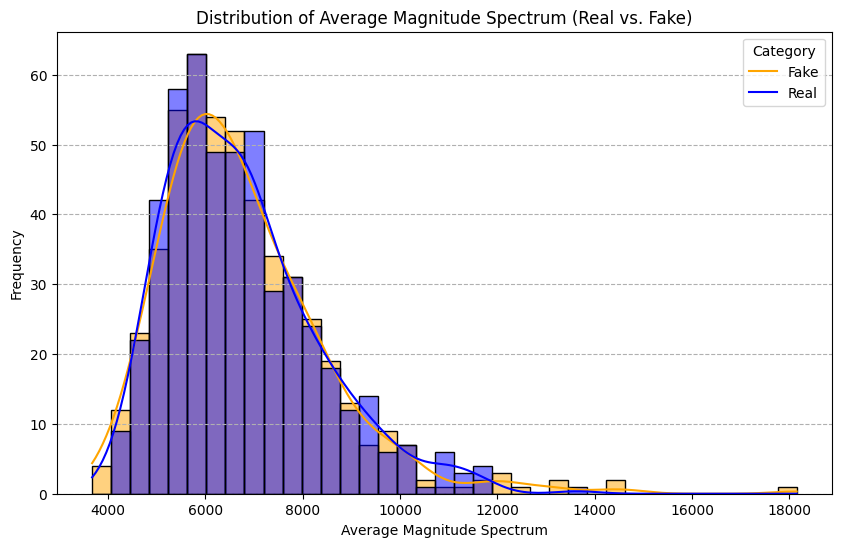

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df_image_properties, x='avg_magnitude', hue='category', kde=True, palette={'real': 'blue', 'fake': 'orange'})
plt.title('Distribution of Average Magnitude Spectrum (Real vs. Fake)')
plt.xlabel('Average Magnitude Spectrum')
plt.ylabel('Frequency')
plt.legend(title='Category', labels=['Fake', 'Real'])
plt.grid(axis='y', linestyle='--')
plt.show()

## Summary: Final Observations on Average Magnitude Spectrum

### Q&A
This analysis focused on calculating the average magnitude spectrum for each image and then comparing its distribution between real and fake images.

### Data Analysis Key Findings
*   **Average Magnitude Spectrum Calculation**: The `avg_magnitude` was successfully calculated for each image by converting it to grayscale, performing a 2D FFT, computing the magnitude spectrum, and then taking its average.
*   **Descriptive Statistics**: The descriptive statistics for the `avg_magnitude` column show that the mean average magnitude for real images (~6741.40) and fake images (~6760.56) are very close. The standard deviations are also comparable (~1562.15 for real and ~1723.95 for fake), indicating similar variability in the frequency domain.
*   **Visual Distribution**: The histogram visualizing the `avg_magnitude` further reinforced these findings. The distributions for both real and fake images largely overlap, with similar shapes and ranges. There is no clear separation or significant distinguishing pattern in the average magnitude spectrum between the two categories.

### Insights or Next Steps
*   Similar to other basic image properties like dimensions, aspect ratio, average RGB, and brightness, the average magnitude spectrum (a measure of overall frequency content) does not appear to be a strong distinguishing feature between real and fake images in this dataset. This suggests that the generative model (StyleGAN) is also effective at replicating the general frequency characteristics of real images.
*   Future analysis should delve into more granular frequency domain features, such as specific frequency bands, or the radial average of the magnitude spectrum, which might reveal subtle differences in texture or periodic patterns that are not captured by a single average magnitude value.

## Visualize Sample FFTs


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def display_magnitude_spectrum(image_path, title):
    try:
        # a. Load the image from the given path
        with Image.open(image_path) as img:
            # b. Convert the image to grayscale
            gray_img = img.convert('L')

            # c. Convert the grayscale image to a NumPy array
            img_array = np.array(gray_img)

            # d. Perform a 2D Fast Fourier Transform (FFT)
            fft_transform = np.fft.fft2(img_array)

            # e. Shift the zero-frequency component to the center of the spectrum
            fft_shifted = np.fft.fftshift(fft_transform)

            # f. Compute the magnitude spectrum
            magnitude_spectrum = np.abs(fft_shifted)

            # g. Display the magnitude spectrum
            plt.imshow(np.log(magnitude_spectrum + 1), cmap='gray') # Use log scale for better visualization

            # h. Set the title of the plot and turn off the axes
            plt.title(title)
            plt.axis('off')
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

print("display_magnitude_spectrum function defined.")

display_magnitude_spectrum function defined.


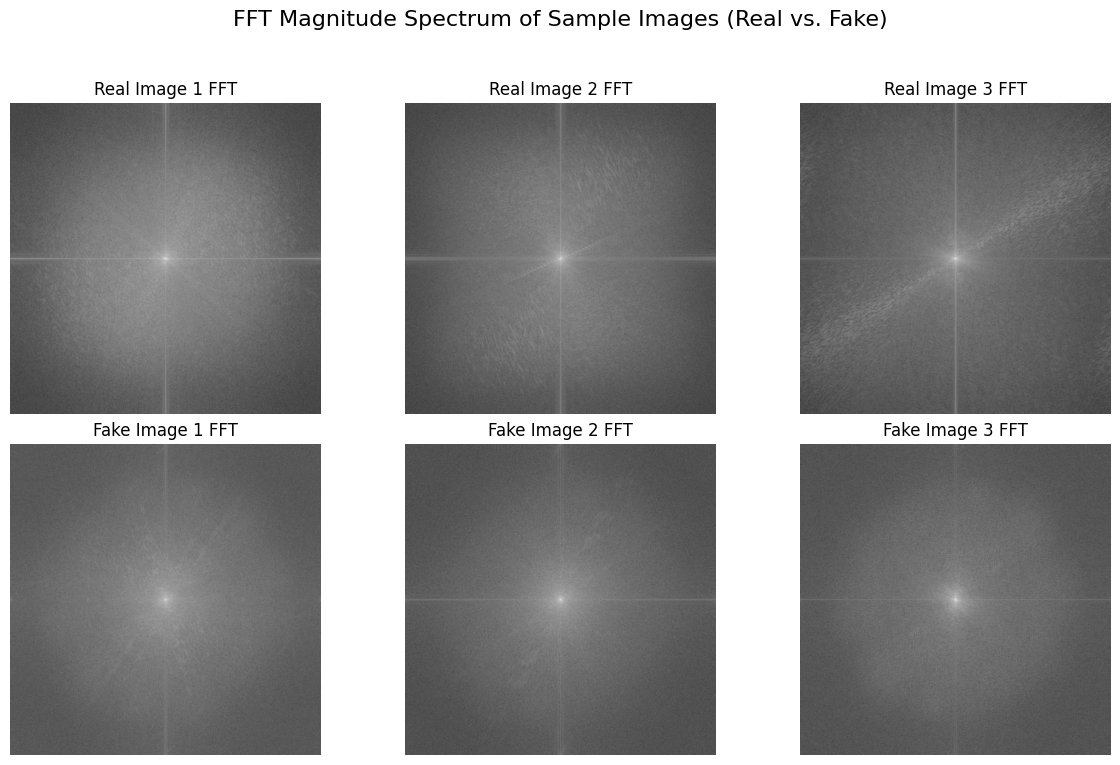

In [ ]:
num_images_to_display = 3 # Display 3 real and 3 fake images

# Select a small number of image paths for visualization
sampled_real_for_fft_display = sampled_real_images_subset[:num_images_to_display]
sampled_fake_for_fft_display = sampled_fake_images_subset[:num_images_to_display]

# Create a matplotlib figure with subplots
plt.figure(figsize=(num_images_to_display * 4, 8))
plt.suptitle('FFT Magnitude Spectrum of Sample Images (Real vs. Fake)', fontsize=16)

# Display real images FFT
for i, img_path in enumerate(sampled_real_for_fft_display):
    plt.subplot(2, num_images_to_display, i + 1)
    display_magnitude_spectrum(img_path, f'Real Image {i+1} FFT')

# Display fake images FFT
for i, img_path in enumerate(sampled_fake_for_fft_display):
    plt.subplot(2, num_images_to_display, num_images_to_display + i + 1)
    display_magnitude_spectrum(img_path, f'Fake Image {i+1} FFT')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Observations from Visualizing FFT Magnitude Spectra

*   **General Appearance**: The FFT magnitude spectra for both real and fake images generally exhibit a similar central bright spot, which corresponds to low-frequency components (overall brightness and large-scale structures). This is expected as most images contain significant low-frequency information.
*   **High-Frequency Components**: The high-frequency components, which represent details, textures, and edges, are visible further away from the center. Visually, there doesn't seem to be a stark, immediate difference in the distribution or intensity of these high-frequency components between the real and fake images displayed. Both categories show a gradual decay in magnitude as frequency increases, which is typical for natural images.
*   **Symmetry and Patterns**: The 2D FFT spectra often display certain symmetries or patterns that can indicate structural regularity or repetitive patterns in the image. In these sampled images, both real and fake spectra show some degree of symmetry, suggesting a general fidelity of the StyleGAN model in capturing spatial arrangements.
*   **Subtle Differences**: While gross differences are not immediately apparent, extremely subtle variations in the texture or spread of the high-frequency components might exist. However, visual inspection of a few samples is not conclusive for statistical significance.

**Conclusion from Visual Inspection**: The visual examination of the FFT magnitude spectra for a small number of real and fake images suggests that the StyleGAN generated images closely mimic the frequency domain characteristics of real images, particularly in terms of overall energy distribution and the presence of both low and high-frequency content. This reinforces previous findings that basic aggregate statistical measures and general visual properties do not easily differentiate between the two categories.

## Summary:

### Q&A
This analysis aimed to summarize findings from frequency domain analysis, highlighting any significant differences or patterns observed between real and fake images based on 2D Fast Fourier Transform (FFT) and magnitude spectrum calculations.

### Data Analysis Key Findings
*   **Average Magnitude Spectrum Similarity**: The average magnitude spectrum, calculated for both real and fake images, showed very similar statistical properties. The mean average magnitude for real images was approximately 6741.40, while for fake images it was about 6760.56. Standard deviations were also comparable (~1562.15 for real and ~1723.95 for fake).
*   **Overlapping Distributions**: A histogram visualizing the distribution of the average magnitude spectrum further confirmed that the distributions for real and fake images largely overlapped, indicating no clear separation or distinguishing pattern based on this metric.
*   **Visual FFT Spectra Resemblance**: Visual inspection of the 2D FFT magnitude spectra for sample real and fake images revealed a striking resemblance. Both categories exhibited a characteristic central bright spot corresponding to low-frequency components and a gradual decay of magnitude for high-frequency components, typical of natural images.
*   **Lack of Obvious Visual Differences**: There were no stark or immediate visual differences observed in the distribution or intensity of high-frequency components, symmetry, or overall patterns between the FFT magnitude spectra of real and fake images from the sampled subset.

### Insights or Next Steps
*   Both quantitative (average magnitude spectrum) and qualitative (visual FFT spectra) analyses suggest that StyleGAN-generated images effectively replicate the general frequency domain characteristics of real images, making it difficult to differentiate them using these basic frequency-based features.
*   Future analysis should delve into more granular frequency domain features, such as specific frequency band analysis, radial averages of the magnitude spectrum, or other advanced texture descriptors, which might reveal subtle differences not captured by a single average magnitude value or gross visual inspection.
